# Meta Methods applied to the earthquakes damage prediction

In [1]:
# Import libraries 
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings

from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix
 


In [22]:
drive.mount("/content/drive")

%matplotlib inline 

#link train_labels
linkLabels = "/content/drive/MyDrive/MD/Lab2/Entrega/dades/train_labels_Prep.csv"

#link train_labels
linkValues = "/content/drive/MyDrive/MD/Lab2/Entrega/dades/train_values_Prep_ME.csv"

#link train_labelsB
linkLabelsB = "/content/drive/MyDrive/MD/Lab2/Entrega/dades/train_labels_Prep_Bal.csv"

#link train_labelsB
linkValuesB = "/content/drive/MyDrive/MD/Lab2/Entrega/dades/train_values_Prep_ME_Bal.csv"
X_test_final = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/Competicio/test_values_Prep_ME.csv")
X_test_final.head()
BuildingId = X_test_final.pop('building_id')

#Read num_rows_to_read first rows
#num_rows_to_read = 40000
X = pd.read_csv(linkValues)

y = pd.read_csv(linkLabels)
XB = pd.read_csv(linkValuesB)
yB = pd.read_csv(linkLabelsB)

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=5)

(X_trainB, X_testB,  y_trainB, y_testB) = cv.train_test_split(XB, yB, test_size=.3, random_state=5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
print(X_test_final.columns)


(86868, 35)


In [ ]:
XB.shape
XB.columns[22]


'roof_type_n'

In [13]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    display(HTML(df.to_html(index=False,justify="center")))
    df2 = reportAccuracyDF(report)
    
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

In [14]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


## Voting scheme

Agafar els millors parametres de cada Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:


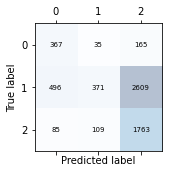

Class Name,precision,recall,f1-score,support
1,0.39,0.65,0.48,567
2,0.72,0.11,0.19,3476
3,0.39,0.90,0.54,1957


accuracy,,,0.42,6000
macro avg,0.50,0.55,0.40,6000
weighted avg,0.58,0.42,0.33,6000


In [ ]:
#Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_predict = gnb.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, gnb_predict))
prettyReport(classification_report(y_test, gnb_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:


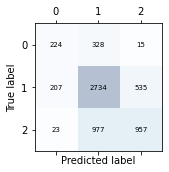

Class Name,precision,recall,f1-score,support
1,0.49,0.40,0.44,567
2,0.68,0.79,0.73,3476
3,0.64,0.49,0.55,1957


accuracy,,,0.65,6000
macro avg,0.60,0.56,0.57,6000
weighted avg,0.65,0.65,0.64,6000


In [ ]:
#knn
knn =  KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, knn_pred))
prettyReport(classification_report(y_test, knn_pred))

Confusion Matrix:


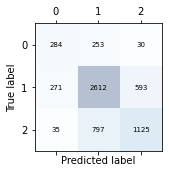

Class Name,precision,recall,f1-score,support
1,0.48,0.50,0.49,567
2,0.71,0.75,0.73,3476
3,0.64,0.57,0.61,1957


accuracy,,,0.67,6000
macro avg,0.61,0.61,0.61,6000
weighted avg,0.67,0.67,0.67,6000


In [ ]:
#Decison trees

dt=tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    min_samples_split=13,
    min_impurity_decrease=0.0
    ).fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, dt_pred))
prettyReport(classification_report(y_test, dt_pred))

Confusion Matrix:


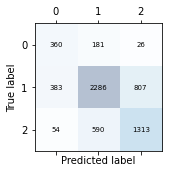

Class Name,precision,recall,f1-score,support
1,0.45,0.63,0.53,567
2,0.75,0.66,0.70,3476
3,0.61,0.67,0.64,1957


accuracy,,,0.66,6000
macro avg,0.60,0.65,0.62,6000
weighted avg,0.68,0.66,0.66,6000


In [ ]:

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', gnb), ('knn3', knn), ('dt', dt)], voting='hard')
eclf.fit(X_train,y_train)

eclf_pred = eclf.predict(X_test)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, eclf_pred))
prettyReport(classification_report(y_test, eclf_pred))


Confusion Matrix:


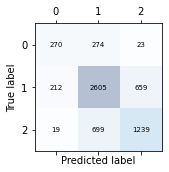

Class Name,precision,recall,f1-score,support
1,0.54,0.48,0.51,567
2,0.73,0.75,0.74,3476
3,0.64,0.63,0.64,1957


accuracy,,,0.69,6000
macro avg,0.64,0.62,0.63,6000
weighted avg,0.68,0.69,0.68,6000


In [ ]:
eclf_w = VotingClassifier(estimators=[('nb', gnb), ('knn3', knn), ('dt', dt)],voting='soft', weights=[1,3,3]).fit(X_train, y_train)
eclf_w_pred = eclf_w.predict(X_test)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, eclf_w_pred))
prettyReport(classification_report(y_test, eclf_w_pred))

## Bagging

Confusion Matrix:


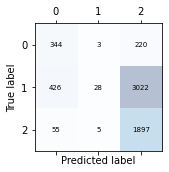

Class Name,precision,recall,f1-score,support
1,0.42,0.61,0.49,567
2,0.78,0.01,0.02,3476
3,0.37,0.97,0.53,1957


accuracy,,,0.38,6000
macro avg,0.52,0.53,0.35,6000
weighted avg,0.61,0.38,0.23,6000


Confusion Matrix:


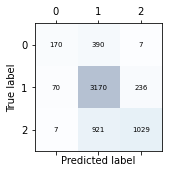

Class Name,precision,recall,f1-score,support
1,0.69,0.30,0.42,567
2,0.71,0.91,0.80,3476
3,0.81,0.53,0.64,1957


accuracy,,,0.73,6000
macro avg,0.73,0.58,0.62,6000
weighted avg,0.74,0.73,0.71,6000


Confusion Matrix:


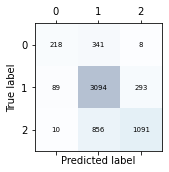

Class Name,precision,recall,f1-score,support
1,0.69,0.38,0.49,567
2,0.72,0.89,0.80,3476
3,0.78,0.56,0.65,1957


accuracy,,,0.73,6000
macro avg,0.73,0.61,0.65,6000
weighted avg,0.74,0.73,0.72,6000


In [ ]:
from sklearn.ensemble import BaggingClassifier


gnb_bg = BaggingClassifier(base_estimator=gnb,n_estimators=200,max_features=0.35, random_state = 4).fit(X_train, y_train)
gnb_bg_pred = gnb_bg.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, gnb_bg_pred))
prettyReport(classification_report(y_test, gnb_bg_pred))

knn_bg = BaggingClassifier(base_estimator=knn,n_estimators=200,max_features=0.35, random_state = 4).fit(X_train, y_train)
knn_bg_pred = knn_bg.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, knn_bg_pred))
prettyReport(classification_report(y_test, knn_bg_pred))

dt_bg = BaggingClassifier(base_estimator=dt,n_estimators=100,max_features=0.35, random_state = 4).fit(X_train, y_train)
dt_bg_pred = dt_bg.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, dt_bg_pred))
prettyReport(classification_report(y_test, dt_bg_pred))


## Random Forest

Confusion Matrix:


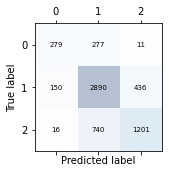

Class Name,precision,recall,f1-score,support
1,0.63,0.49,0.55,567
2,0.74,0.83,0.78,3476
3,0.73,0.61,0.67,1957


accuracy,,,0.73,6000
macro avg,0.70,0.65,0.67,6000
weighted avg,0.73,0.73,0.72,6000



Confusion Matrix:


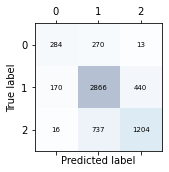

Class Name,precision,recall,f1-score,support
1,0.60,0.50,0.55,567
2,0.74,0.82,0.78,3476
3,0.73,0.62,0.67,1957


accuracy,,,0.73,6000
macro avg,0.69,0.65,0.66,6000
weighted avg,0.72,0.73,0.72,6000


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc_1 = RandomForestClassifier(n_estimators=100, random_state = 4).fit(X_train, y_train)
rfc_1_pred = rfc_1.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, rfc_1_pred))
prettyReport(classification_report(y_test, rfc_1_pred))
print()
rfc_2 = RandomForestClassifier(n_estimators=200, max_features = 0.35, random_state=4).fit(X_train, y_train)
rfc_2_pred = rfc_2.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, rfc_2_pred))
prettyReport(classification_report(y_test, rfc_2_pred))

Confusion Matrix:


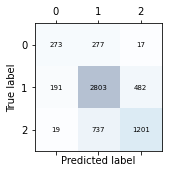

Class Name,precision,recall,f1-score,support
1,0.57,0.48,0.52,567
2,0.73,0.81,0.77,3476
3,0.71,0.61,0.66,1957


accuracy,,,0.71,6000
macro avg,0.67,0.63,0.65,6000
weighted avg,0.71,0.71,0.71,6000



Confusion Matrix:


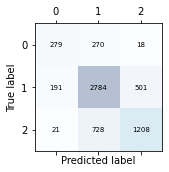

Class Name,precision,recall,f1-score,support
1,0.57,0.49,0.53,567
2,0.74,0.80,0.77,3476
3,0.70,0.62,0.66,1957


accuracy,,,0.71,6000
macro avg,0.67,0.64,0.65,6000
weighted avg,0.71,0.71,0.71,6000


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


etc_1 = ExtraTreesClassifier(n_estimators=100, random_state = 4).fit(X_train, y_train)
etc_1_pred = etc_1.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, etc_1_pred))
prettyReport(classification_report(y_test, etc_1_pred))
print()
etc_2 = ExtraTreesClassifier(n_estimators=100, max_features = 0.35,random_state = 4).fit(X_train, y_train)
etc_2_pred = etc_2.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, etc_2_pred))
prettyReport(classification_report(y_test, etc_2_pred))

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
cv = 4
lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(dt,n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.671 [1]
Accuracy: 0.665 [2]
Accuracy: 0.693 [5]
Accuracy: 0.705 [10]
Accuracy: 0.713 [20]
Accuracy: 0.721 [50]
Accuracy: 0.720 [100]
Accuracy: 0.722 [200]


Confusion Matrix:


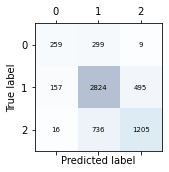

Class Name,precision,recall,f1-score,support
1,0.60,0.46,0.52,567
2,0.73,0.81,0.77,3476
3,0.71,0.62,0.66,1957


accuracy,,,0.71,6000
macro avg,0.68,0.63,0.65,6000
weighted avg,0.71,0.71,0.71,6000


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt, n_estimators=50, random_state=4).fit(X_train, y_train)
abc_pred = abc.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, abc_pred))
prettyReport(classification_report(y_test, abc_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.573 [1]
Accuracy: 0.658 [2]
Accuracy: 0.706 [5]
Accuracy: 0.732 [10]
Accuracy: 0.740 [20]
Accuracy: 0.744 [50]
Accuracy: 0.744 [100]
Accuracy: 0.743 [200]


Confusion Matrix:


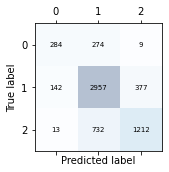

Class Name,precision,recall,f1-score,support
1,0.65,0.50,0.56,567
2,0.75,0.85,0.79,3476
3,0.76,0.62,0.68,1957


accuracy,,,0.74,6000
macro avg,0.72,0.66,0.68,6000
weighted avg,0.74,0.74,0.74,6000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state = 4).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_test, gbc_pred))
prettyReport(classification_report(y_test, gbc_pred))

## Feature Selection with Forests of trees

> Indented block



In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[2.26164135e-02 1.00684649e-01 9.46990551e-02 7.23599796e-03
 1.34457582e-02 3.98529813e-03 3.13643260e-03 5.84698579e-03
 6.57475455e-03 1.29039237e-02 6.86073616e-03 4.36815190e-03
 2.36750966e-03 3.43864352e-03 8.23276152e-03 3.72963153e-03
 9.11302500e-03 1.01535823e-03 6.98993988e-03 1.28874106e-02
 3.49679758e-03 3.62882609e-03 9.47021870e-03 8.82536712e-03
 7.65681525e-03 8.59377731e-03 3.36082941e-04 8.65669599e-03
 6.17532969e-03 8.65712584e-04 5.31886997e-03 9.94230245e-03
 3.10520298e-03 7.20161536e-03 1.60162550e-04 2.63106748e-04
 4.47588493e-03 1.45902874e-05 1.39800381e-04 1.99445686e-04
 2.94684212e-03 3.95938431e-04 2.22130896e-03 2.73102664e-03
 1.50139980e-03 4.34432282e-03 1.56502928e-03 8.52036926e-02
 1.95708940e-01 2.84722458e-01]


In [ ]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(20000, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6453500000000001
0.68075


In [ ]:
thresholds=clf.feature_importances_

print(thresholds)  

for threshold in thresholds:
   if threshold < 0.015:
     thresholds = thresholds[thresholds != threshold]

thresholds = np.append(thresholds, 0.001)

print(thresholds)  

[2.26164135e-02 1.00684649e-01 9.46990551e-02 7.23599796e-03
 1.34457582e-02 3.98529813e-03 3.13643260e-03 5.84698579e-03
 6.57475455e-03 1.29039237e-02 6.86073616e-03 4.36815190e-03
 2.36750966e-03 3.43864352e-03 8.23276152e-03 3.72963153e-03
 9.11302500e-03 1.01535823e-03 6.98993988e-03 1.28874106e-02
 3.49679758e-03 3.62882609e-03 9.47021870e-03 8.82536712e-03
 7.65681525e-03 8.59377731e-03 3.36082941e-04 8.65669599e-03
 6.17532969e-03 8.65712584e-04 5.31886997e-03 9.94230245e-03
 3.10520298e-03 7.20161536e-03 1.60162550e-04 2.63106748e-04
 4.47588493e-03 1.45902874e-05 1.39800381e-04 1.99445686e-04
 2.94684212e-03 3.95938431e-04 2.22130896e-03 2.73102664e-03
 1.50139980e-03 4.34432282e-03 1.56502928e-03 8.52036926e-02
 1.95708940e-01 2.84722458e-01]
[0.02261641 0.10068465 0.09469906 0.08520369 0.19570894 0.28472246
 0.001     ]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439

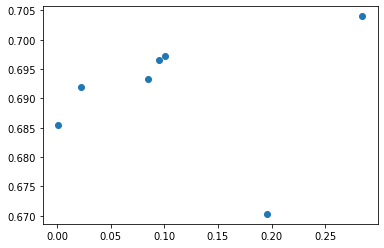

Best threshold:  0.2847224582955833


In [ ]:

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=max(threshold,0.01))
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(20000, 1)
Original:  0.5981000000000001
With FS:  0.704


## Voting scheme (Balanced)

Agafar els millors parametres de cada Classifier

Confusion Matrix:


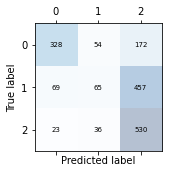

Class Name,precision,recall,f1-score,support
1,0.78,0.59,0.67,554
2,0.42,0.11,0.17,591
3,0.46,0.90,0.61,589


accuracy,,,0.53,1734
macro avg,0.55,0.53,0.48,1734
weighted avg,0.55,0.53,0.48,1734


In [ ]:
#Naive Bayes

gnbB = GaussianNB()
gnbB.fit(X_trainB,y_trainB)

gnb_predictB = gnbB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, gnb_predictB))
prettyReport(classification_report(y_testB, gnb_predictB))

Confusion Matrix:


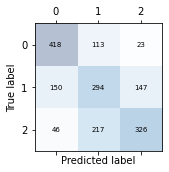

Class Name,precision,recall,f1-score,support
1,0.68,0.75,0.72,554
2,0.47,0.50,0.48,591
3,0.66,0.55,0.60,589


accuracy,,,0.60,1734
macro avg,0.60,0.60,0.60,1734
weighted avg,0.60,0.60,0.60,1734


In [ ]:
#knn
knnB =  KNeighborsClassifier().fit(X_trainB, y_trainB)
knn_predB = knnB.predict(X_testB)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, knn_predB))
prettyReport(classification_report(y_testB, knn_predB))

Confusion Matrix:


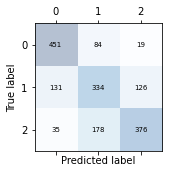

Class Name,precision,recall,f1-score,support
1,0.73,0.81,0.77,554
2,0.56,0.57,0.56,591
3,0.72,0.64,0.68,589


accuracy,,,0.67,1734
macro avg,0.67,0.67,0.67,1734
weighted avg,0.67,0.67,0.67,1734


In [ ]:
#Decison trees

dtB=tree.DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    min_samples_split=13,
    min_impurity_decrease=0.0
    ).fit(X_trainB, y_trainB)
dt_predB = dtB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, dt_predB))
prettyReport(classification_report(y_testB, dt_predB))

Confusion Matrix:


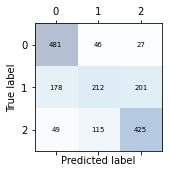

Class Name,precision,recall,f1-score,support
1,0.68,0.87,0.76,554
2,0.57,0.36,0.44,591
3,0.65,0.72,0.68,589


accuracy,,,0.64,1734
macro avg,0.63,0.65,0.63,1734
weighted avg,0.63,0.64,0.63,1734


In [ ]:

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclfB = VotingClassifier(estimators=[('nb', gnbB), ('knn3', knnB), ('dt', dtB)], voting='hard')
eclfB.fit(X_trainB,y_trainB)

eclf_predB = eclfB.predict(X_testB)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, eclf_predB))
prettyReport(classification_report(y_testB, eclf_predB))


Confusion Matrix:


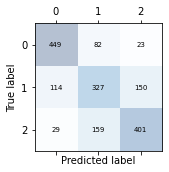

Class Name,precision,recall,f1-score,support
1,0.76,0.81,0.78,554
2,0.58,0.55,0.56,591
3,0.70,0.68,0.69,589


accuracy,,,0.68,1734
macro avg,0.68,0.68,0.68,1734
weighted avg,0.68,0.68,0.68,1734


In [ ]:
eclf_wB = VotingClassifier(estimators=[('nb', gnbB), ('knn3', knnB), ('dt', dtB)],voting='soft', weights=[1,3,5]).fit(X_trainB, y_trainB)
eclf_w_predB = eclf_wB.predict(X_testB)

print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, eclf_w_predB))
prettyReport(classification_report(y_testB, eclf_w_predB))

## Bagging (Balanced)

Confusion Matrix:


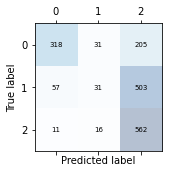

Class Name,precision,recall,f1-score,support
1,0.82,0.57,0.68,554
2,0.40,0.05,0.09,591
3,0.44,0.95,0.60,589


accuracy,,,0.53,1734
macro avg,0.55,0.53,0.46,1734
weighted avg,0.55,0.53,0.45,1734


Confusion Matrix:


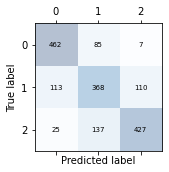

Class Name,precision,recall,f1-score,support
1,0.77,0.83,0.80,554
2,0.62,0.62,0.62,591
3,0.78,0.72,0.75,589


accuracy,,,0.72,1734
macro avg,0.73,0.73,0.73,1734
weighted avg,0.73,0.72,0.72,1734


Confusion Matrix:


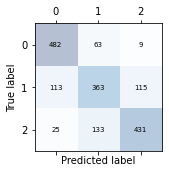

Class Name,precision,recall,f1-score,support
1,0.78,0.87,0.82,554
2,0.65,0.61,0.63,591
3,0.78,0.73,0.75,589


accuracy,,,0.74,1734
macro avg,0.73,0.74,0.74,1734
weighted avg,0.73,0.74,0.73,1734


In [ ]:
from sklearn.ensemble import BaggingClassifier


gnb_bgB = BaggingClassifier(base_estimator=gnbB,n_estimators=200,max_features=0.35, random_state = 4).fit(X_trainB, y_trainB)
gnb_bg_predB = gnb_bgB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, gnb_bg_predB))
prettyReport(classification_report(y_testB, gnb_bg_predB))

knn_bgB = BaggingClassifier(base_estimator=knnB,n_estimators=200,max_features=0.35, random_state = 4).fit(X_trainB, y_trainB)
knn_bg_predB = knn_bgB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, knn_bg_predB))
prettyReport(classification_report(y_testB, knn_bg_predB))

dt_bgB = BaggingClassifier(base_estimator=dtB,n_estimators=100,max_features=0.35, random_state = 4).fit(X_trainB, y_trainB)
dt_bg_predB = dt_bgB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, dt_bg_predB))
prettyReport(classification_report(y_testB, dt_bg_predB))


## Random Forest (Balanced)

Confusion Matrix:


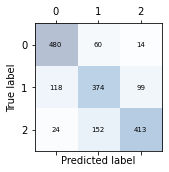

Class Name,precision,recall,f1-score,support
1,0.77,0.87,0.82,554
2,0.64,0.63,0.64,591
3,0.79,0.70,0.74,589


accuracy,,,0.73,1734
macro avg,0.73,0.73,0.73,1734
weighted avg,0.73,0.73,0.73,1734



Confusion Matrix:


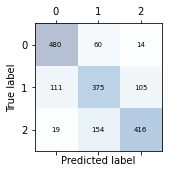

Class Name,precision,recall,f1-score,support
1,0.79,0.87,0.82,554
2,0.64,0.63,0.64,591
3,0.78,0.71,0.74,589


accuracy,,,0.73,1734
macro avg,0.73,0.74,0.73,1734
weighted avg,0.73,0.73,0.73,1734


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc_1B = RandomForestClassifier(n_estimators=100, random_state = 4).fit(X_trainB, y_trainB)
rfc_1_predB = rfc_1B.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, rfc_1_predB))
prettyReport(classification_report(y_testB, rfc_1_predB))
print()
rfc_2B = RandomForestClassifier(n_estimators=200, max_features = 0.35, random_state=4).fit(X_trainB, y_trainB)
rfc_2_predB = rfc_2B.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, rfc_2_predB))
prettyReport(classification_report(y_testB, rfc_2_predB))

Confusion Matrix:


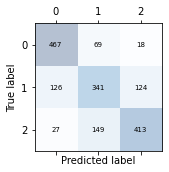

Class Name,precision,recall,f1-score,support
1,0.75,0.84,0.80,554
2,0.61,0.58,0.59,591
3,0.74,0.70,0.72,589


accuracy,,,0.70,1734
macro avg,0.70,0.71,0.70,1734
weighted avg,0.70,0.70,0.70,1734



Confusion Matrix:


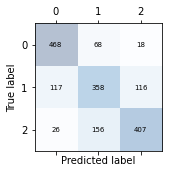

Class Name,precision,recall,f1-score,support
1,0.77,0.84,0.80,554
2,0.62,0.61,0.61,591
3,0.75,0.69,0.72,589


accuracy,,,0.71,1734
macro avg,0.71,0.71,0.71,1734
weighted avg,0.71,0.71,0.71,1734


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


etc_1B = ExtraTreesClassifier(n_estimators=100, random_state = 4).fit(X_trainB, y_trainB)
etc_1_predB = etc_1B.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, etc_1_predB))
prettyReport(classification_report(y_testB, etc_1_predB))
print()
etc_2B = ExtraTreesClassifier(n_estimators=100, max_features = 0.35,random_state = 4).fit(X_trainB, y_trainB)
etc_2_predB = etc_2B.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, etc_2_predB))
prettyReport(classification_report(y_testB, etc_2_predB))

## Boosting (Balanced)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
cv = 4
lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(dtB,n_estimators=nest), XB, yB, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.672 [1]
Accuracy: 0.661 [2]
Accuracy: 0.702 [5]
Accuracy: 0.707 [10]
Accuracy: 0.713 [20]
Accuracy: 0.726 [50]
Accuracy: 0.734 [100]
Accuracy: 0.731 [200]


Confusion Matrix:


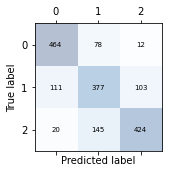

Class Name,precision,recall,f1-score,support
1,0.78,0.84,0.81,554
2,0.63,0.64,0.63,591
3,0.79,0.72,0.75,589


accuracy,,,0.73,1734
macro avg,0.73,0.73,0.73,1734
weighted avg,0.73,0.73,0.73,1734


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcB = AdaBoostClassifier(dtB, n_estimators=200).fit(X_trainB, y_trainB)
abc_predB = abcB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, abc_predB))
prettyReport(classification_report(y_testB, abc_predB))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), XB, yB, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.733 [1]
Accuracy: 0.735 [2]
Accuracy: 0.738 [5]
Accuracy: 0.741 [10]
Accuracy: 0.742 [20]
Accuracy: 0.744 [50]
Accuracy: 0.746 [100]
Accuracy: 0.741 [200]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:


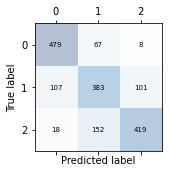

Class Name,precision,recall,f1-score,support
1,0.79,0.86,0.83,554
2,0.64,0.65,0.64,591
3,0.79,0.71,0.75,589


accuracy,,,0.74,1734
macro avg,0.74,0.74,0.74,1734
weighted avg,0.74,0.74,0.74,1734


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbcB = GradientBoostingClassifier(n_estimators=100).fit(X_trainB, y_trainB)
gbc_predB = gbcB.predict(X_testB)
print("Confusion Matrix:")
prettyConfusionMatrix(confusion_matrix(y_testB, gbc_predB))
prettyReport(classification_report(y_testB, gbc_predB))

In [17]:
predicted = gbcB.predict(X_test_final)

result = pd.DataFrame(data = predicted)

result[0] = le.inverse_transform(result[0])
result = pd.concat([index,result],axis=1)
result.columns = ["building_id","class"]
result.to_csv('resultatsGradientBoosting.csv',index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- height_percentage
Feature names seen at fit time, yet now missing:
- land_surface_condition_n
- land_surface_condition_o
- land_surface_condition_t
- legal_ownership_status_a
- legal_ownership_status_r
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored